# Object Detection and Tracking Exercise


### Step 1: Import Important Packages


In [25]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from glob import glob
import IPython.display as ipd
from tqdm import tqdm
import subprocess
plt.style.use('ggplot')

### Step 2: Display Video


In [26]:
ipd.Video('026c7465-309f6d33.mp4', width=700)

### Step 3: Read Video Metadata


In [27]:
cap = cv2.VideoCapture('026c7465-309f6d33.mp4') # Take the video
# Get total number of frames
frame_count = cap.get(cv2.CAP_PROP_FRAME_COUNT)
# Get video height and width
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
# Get frames per second
fps = cap.get(cv2.CAP_PROP_FPS)
cap.release() # Leave the video (reverse capture)
print(f'Height: {height}, Width: {width}, FPS: {fps}')

Height: 720.0, Width: 1280.0, FPS: 59.94005994005994


### Step 4: Extract and Display Video Frames


In [28]:
# Helper function to display OpenCV images in a notebook
def display_cv2_img(img, figsize=(10, 10)):
    img_ = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert BGR to RGB (Color formulation)
    fig, ax = plt.subplots(figsize=figsize)
    ax.imshow(img_) # Show the img
    ax.axis('off') # Remove axis

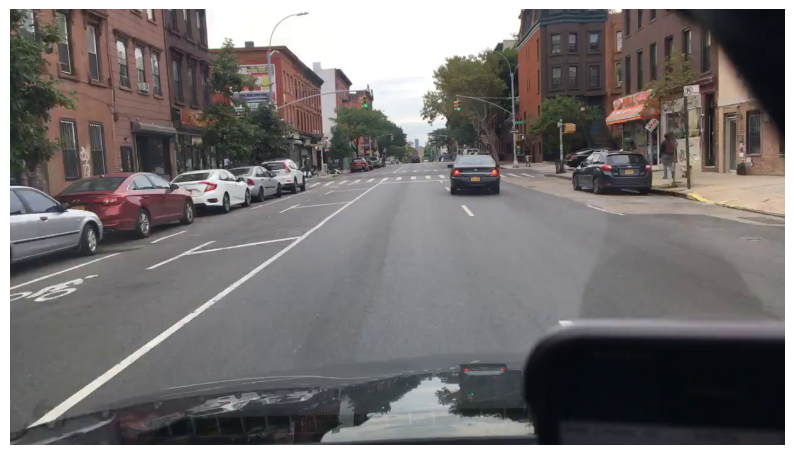

In [29]:
# Extract and display a frame
cap = cv2.VideoCapture('026c7465-309f6d33.mp4')
ret, img = cap.read()
cap.release()
if ret:
    display_cv2_img(img)

### Step 5: Annotate Frames with Labels


In [30]:
# Read the labels from CSV
labels = pd.read_csv('/content/labels.csv', low_memory=False)
video_labels = labels.query('videoName == "026c7465-309f6d33"').reset_index(drop=True)
video_labels['video_frame'] = (video_labels['frameIndex'] * 11.9).round().astype(int)

In [31]:
video_labels["category"].value_counts()

,count
category,
car,3030
pedestrian,847
bicycle,381
rider,320
truck,194
other vehicle,115
bus,109
other person,74
motorcycle,67


annotate and show frame number 1035 (Selected Randomly)

In [32]:
cap = cv2.VideoCapture('026c7465-309f6d33.mp4')
for frame in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))):
    ret, img = cap.read()
    if frame == 1035:
        break
cap.release()

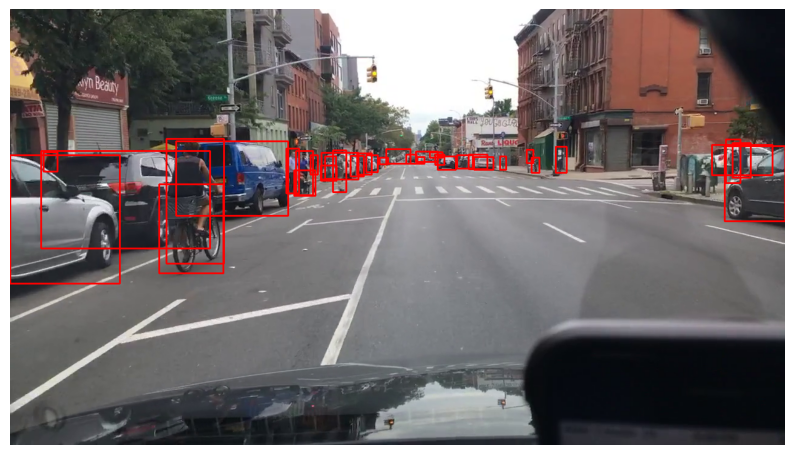

In [33]:
# Annotate the frame
frame_labels = video_labels.query('video_frame == 1035')
for _, d in frame_labels.iterrows(): # Bounding Box
    pt1 = int(d['box2d.x1']), int(d['box2d.y1'])
    pt2 = int(d['box2d.x2']), int(d['box2d.y2'])
    cv2.rectangle(img, pt1, pt2, (0, 0, 255), 2) # Red color , 3 mean thicks degree
display_cv2_img(img)

In [34]:
frame_labels.video_frame.value_counts() # 36 label

,count
video_frame,
1035,36


###Step 6: Displaying Objects Colored by Category

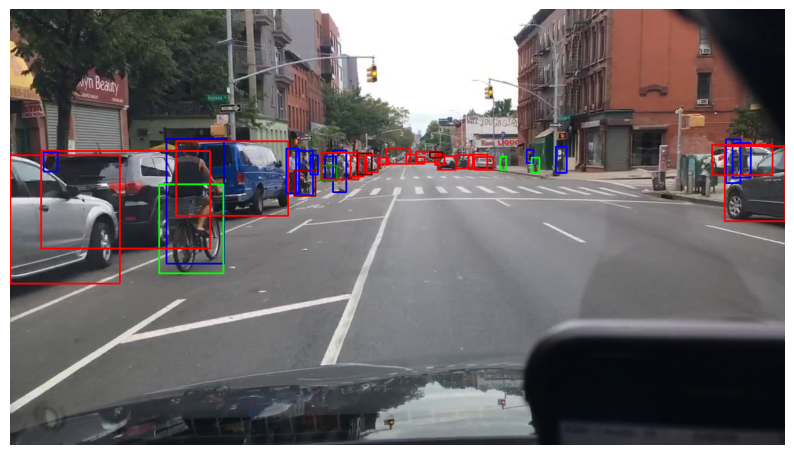

In [35]:
color_map = {
    "car": (0, 0, 255),
    "truck": (0, 0, 100),
    "pedestrian": (255, 0, 0),
    "other vehicle": (0, 0, 150),
    "rider": (200, 0, 0),
    "bicycle": (0, 255, 0),
    "other person": (200, 0, 0),
    "trailer": (0, 150, 150),
    "motorcycle": (0, 150, 0),
    "bus": (0, 0, 100),
}

img_example = img.copy()
frame_labels = video_labels.query('video_frame == 1035')
for i, d in frame_labels.iterrows(): # Bounding Box
    pt1 = int(d['box2d.x1']), int(d['box2d.y1'])
    pt2 = int(d['box2d.x2']), int(d['box2d.y2'])
    color = color_map[d['category']] # Category name with applied it's color
    cv2.rectangle(img_example, pt1, pt2, color,2)

display_cv2_img(img_example)

###Step 7: Adding Text

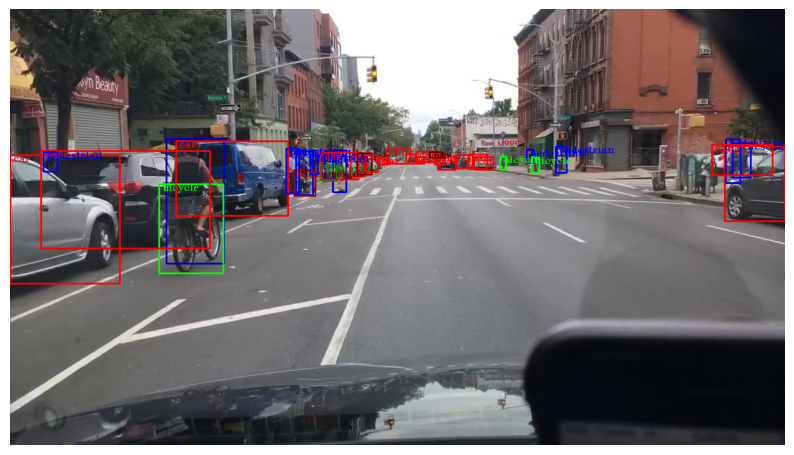

In [36]:
frame_labels = video_labels.query("video_frame == @frame")
font = cv2.FONT_HERSHEY_TRIPLEX # from dec
img_example = img.copy()
for i, d in frame_labels.iterrows():
    pt1 = int(d["box2d.x1"]), int(d["box2d.y1"])
    pt2 = int(d["box2d.x2"]), int(d["box2d.y2"])
    color = color_map[d["category"]]
    img_example = cv2.rectangle(img_example, pt1, pt2, color, 2)
    pt_text = int(d["box2d.x1"]) + 5, int(d["box2d.y1"] + 10) # 5, 10 : offset values
    img_example = cv2.putText(img_example, d["category"], pt_text, font, 0.5, color) # putText: to put annotation name inside Bounding Box
display_cv2_img(img_example)
cap.release()

### Step 8: Save Annotated Video


In [37]:
# Function to add annotations to video
def add_annotations(img, frame, video_labels):
    max_frame = video_labels.query('video_frame <= @frame')['video_frame'].max()
    frame_labels = video_labels.query('video_frame == @max_frame')
    for _, d in frame_labels.iterrows():
        pt1 = int(d['box2d.x1']), int(d['box2d.y1'])
        pt2 = int(d['box2d.x2']), int(d['box2d.y2'])
        color = color_map[d["category"]]
        img = cv2.rectangle(img, pt1, pt2, color, 3)
    return img

# Writing annotations to video
out = cv2.VideoWriter('out_test.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 59.94, (1280, 720)) # Video name and format (Out put video)
cap = cv2.VideoCapture('026c7465-309f6d33.mp4') # capture it form input video
for frame in tqdm(range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT)))):
    ret, img = cap.read()
    if not ret:
        break
    img = add_annotations(img, frame, video_labels)
    out.write(img)
cap.release()
out.release()

100%|██████████| 2398/2398 [00:49<00:00, 48.23it/s]
